In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input,Conv2D, MaxPool2D, Dropout, Flatten, Dense 

import warnings
warnings.filterwarnings("ignore")

In [30]:
img_width, img_height = 100, 100      


train_data_dir = 'D:\\chest_xray\\train'
test_data_dir =  'D:\\chest_xray\\test'

In [31]:
validation_data_dir = 'D:\\chest_xray\\val'

batch_size = 16          

epochs = 5                  


test_batch_size = 30   


input_shape = (img_width, img_height, 3)

In [32]:
model = Sequential()

In [33]:
model.add(Input(shape = input_shape ))

In [34]:
model.add(Conv2D(
             filters=32,                
                                       
            kernel_size=(3, 3),       
           strides = (2,2),           
             padding='valid',           
             activation='relu'
             )
         )

In [35]:
model.add(MaxPool2D())

In [36]:
model.add(Conv2D(
             filters=32,                                           
             kernel_size=(3, 3),        
             activation='relu'
             )
         )

In [37]:
model.add(MaxPool2D())

In [38]:
model.add(Conv2D(
             filters=64,               
                                       
             kernel_size=(3, 3),       
             activation='selu'
             )
         )

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(100,activation = 'tanh'))

In [41]:
model.add(Dropout(rate=0.2))

In [42]:
model.add(Dense(164, activation='relu'))

In [43]:
model.add(Dropout(rate=0.5))

In [44]:
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 49, 49, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 5184)             

In [46]:
model.compile(
              loss='binary_crossentropy',  
              optimizer='adam',        
              metrics=['accuracy'])     

In [47]:
tr_dtgen = ImageDataGenerator(

                              rescale=1. / 255,    
                              shear_range=0.1,       
                              zoom_range=0.2,
                              horizontal_flip=True,
                              )

In [48]:
train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,       
                                               target_size=(img_width, img_height), 
                                               batch_size=batch_size, 
                                               class_mode='binary'  
                                                )

Found 5216 images belonging to 2 classes.


In [49]:
val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [50]:
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),  
                                                     batch_size=batch_size,  
                                                     class_mode='binary'  
                                                     )

Found 16 images belonging to 2 classes.


In [53]:
history = model.fit_generator(
                             
                              generator = train_generator,
                            
                              epochs=2,
                           
                              validation_data=validation_generator,
                              verbose = 1
                              
                              )

Epoch 1/2
326/326 [==============================] - 47s 144ms/step - loss: 0.2271 - accuracy: 0.9057 - val_loss: 0.6719 - val_accuracy: 0.6875
Epoch 2/2
326/326 [==============================] - 48s 147ms/step - loss: 0.2149 - accuracy: 0.9109 - val_loss: 0.8022 - val_accuracy: 0.7500


In [54]:
pred = model.predict(validation_generator, steps = 2)


pred[:5]

2/2 [==============================] - 0s 13ms/step


array([[0.0263305 ],
       [0.9981594 ],
       [0.95649534],
       [0.9873858 ],
       [0.16408242]], dtype=float32)

In [55]:
test_dtgen = ImageDataGenerator(rescale=1. / 255)

# Test data

test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,
                                                # Resize images
                                                target_size=(img_width, img_height),
                                                # batch size to augment at a time
                                                batch_size=batch_size,
                                                # Return 1D array of class labels
                                                class_mode='binary'
                                                )
     

Found 624 images belonging to 2 classes.


In [56]:
# Get iterator
im = test_generator    # Get iterator
images = next(im)      # Get images
images[0].shape

(16, 100, 100, 3)

1/1 [==============================] - 0s 59ms/step


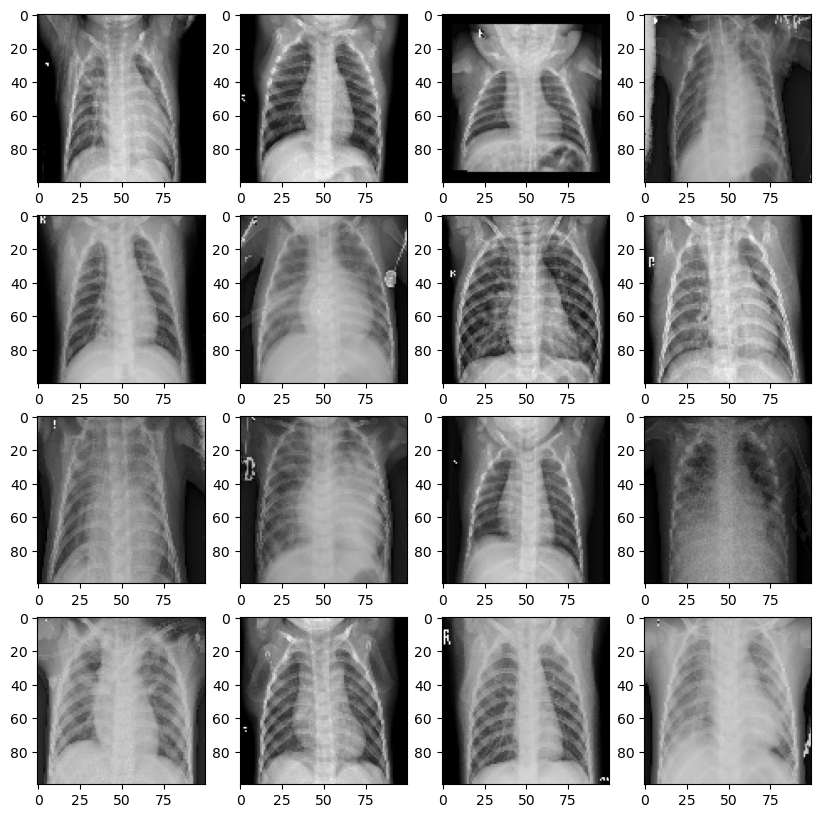

[[0.98176664]
 [0.09903254]
 [0.26672572]
 [0.99993455]
 [0.75114864]
 [0.99960506]
 [0.4874852 ]
 [0.98901534]
 [0.9998198 ]
 [0.9999608 ]
 [0.3234693 ]
 [0.99947387]
 [0.99503344]
 [0.07973853]
 [0.99257624]
 [0.99019355]]


In [57]:
# Make predictions
results = model.predict(images[0])

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;
# Predicted labels
print(results)        
             